<table align="center" width="100%" noborder>
<table bgcolor=#ffffff align="center" width="100%">
    <tr>
        <td align="left" width="30%"><img src="images/IST_logo.png" width="50%"></td>
        <td width="40%"></td>
        <td align="right" width="30%"><img src="images/ds_logo.png" width="25%">
    </tr>
</table>
<h1 align="center" style="font-family:Arial;color:#00004d;font-size:40px;">Data Science</h1>

<h2 align="center" style="font-family:Arial;color:#6c6c6c;font-size:30px;">Lab 1: Data Exploration</h2>

This Data Science laboratorial course was designed independently of the data science tool to use. However, it is my 
opinion that nowadays, the one that demonstrates the best balance between flexibility and results is Python, along with 
the set of packages specific created for this context.

pandas is one of the most well known tool for dealing with datasets, and has a set of predefined methods to deal with it.

The first step in every data science project is to explore the existing data. In order to do that, you need to load each
data file available, and analyze it careful and systematically.

<img src="images/data_exploration.png" width="50%">

<h3 style="font-family:Arial;color:#6c6c6c;font-size:25px;">Contents Identification</h3>

<code>read_csv</code> is one of several methods to import data from external files, and may be parametrized to deal with
different formats and contents (see 
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html">read_csv</a>
documentation to all the details).

In [13]:
import pandas as pd
algae = pd.read_csv('data/algae.csv')

The method returns a pandas <code>DataFrame</code>, the primary pandas data structure, which corresponds to a data table, 
simulating direct access to any element in the table, through a set of predefined properties and methods.

When applied to the data returned <code>head</code> and <code>tail</code> return the first and last n records in the 
dataset, respectively. Showing 5 whenever n is not given.

In [14]:
algae.head()

,season,river_size,fluid_velocity,pH,Oxygen,Chloride,Nitrates,Ammonium,Orthophosphate,Phosphate,Chlorophyll
0,winter,small,medium,8.00,9.8,60.80,6.24,578.00,105.00,170.00,50.0
1,spring,small,medium,8.35,8.0,57.75,1.29,370.00,428.75,558.75,1.3
2,autumn,small,medium,8.10,11.4,40.02,5.33,346.67,125.67,187.06,15.6
3,spring,small,medium,8.07,4.8,77.36,2.30,98.18,61.18,138.70,1.4
4,autumn,small,medium,8.06,9.0,55.35,10.42,233.70,58.22,97.58,10.5


The advantage of the use of such methods is just to inspect if the loading process occurred without problems.

In order to see the number of variables, you can use the property <code>columns</code>. Note that <code>ndim</code> does 
not correspond to the expected number, because it corresponds to the number of dimensions in a dataframe, where each 
column does not correspond to a different dimension.

In [15]:
algae.columns

Index(['season', 'river_size', 'fluid_velocity ', 'pH', 'Oxygen', 'Chloride',
       'Nitrates', 'Ammonium', 'Orthophosphate', 'Phosphate', 'Chlorophyll'],
      dtype='object')

In order to inspect the number of records (rows) in your data, you can apply the <code>len</code> function over the 
dataframe. Again, note that <code>size</code> doesn't return the same value. 

In [16]:
len(algae)

200

Another way to inspect the dataset size, we can use the <code>shape</code> method, which returns the number of records 
and the number of variables, on the first and second position of the tuple, respectively.

In [17]:
algae.shape

(200, 11)

<h3 style="font-family:Arial;color:#6c6c6c;font-size:25px;">Single Variable Analysis</h3>

The analysis of each variable by itself (non relating them with each other), depends on its type. Each variable in a 
DataFrame has one of the numpy types (float, int, bool, timedelta64[ns] and datetime64[ns]), or one of 
<a href="https://pandas.pydata.org/pandas-docs/stable/ecosystem.html#ecosystem-extensions">pandas extension types.</a>

The property <code>dtypes</code> applied to the data object, returns a pandas Series (an object to represent a single 
column) with all the names of the variables in the dataset, and their corresponding types.

In [18]:
algae.dtypes

season              object
river_size          object
fluid_velocity      object
pH                 float64
Oxygen             float64
Chloride           float64
Nitrates           float64
Ammonium           float64
Orthophosphate     float64
Phosphate          float64
Chlorophyll        float64
dtype: object

From the results shown, we see that from the 11 variables, 8 are numerical (<code>float64</code>) and 3 are 
non-numerical (<code>season, river_size</code> and <code>fluid_velocity</code>).

In order to explore those 3 variables, lets see what are the values for each one of them. For that we can select just 
the non-numerical variables directly through <code>select_dtypes</code> method, returning a Series object. Then apply 
the <code>unique</code> method to each column.

In [19]:
cat_vars = algae.select_dtypes(include='object')
for att in cat_vars:
    print(att, algae[att].unique())

season ['winter' 'spring' 'autumn' 'summer']
river_size ['small' 'medium' 'large']
fluid_velocity  ['medium' 'high' 'low']


As we can see, all the 3 variables present a few different string values, which means that they should be categorical 
variables.

In order to change the dataframe, we can cast the data values to be recognized as categorical, through the application 
of the <code>astype</code> method to each column in the dataframe. 

In [20]:
algae[cat_vars.columns] = algae.select_dtypes(['object']).apply(lambda x: x.astype('category'))
algae.dtypes

season             category
river_size         category
fluid_velocity     category
pH                  float64
Oxygen              float64
Chloride            float64
Nitrates            float64
Ammonium            float64
Orthophosphate      float64
Phosphate           float64
Chlorophyll         float64
dtype: object

As seen above, getting the different values of a categorical variable is trivial, but the same does not fit numerical 
ones. Indeed, we don't want to see all values assumed by a real variable.

For numerical variables, the way to inspect their range encompasses studying their minimum and maximum values, along 
with other estimators, like the mean, mode, standard deviation and other different percentiles, which allows for the best
description of this kind of variables.

The <code>describe</code> method, applied to the dataframe, gives the 5-number summary for each numerical variable.

In [21]:
algae.describe()

,pH,Oxygen,Chloride,Nitrates,Ammonium,Orthophosphate,Phosphate,Chlorophyll
count,199.000000,198.000000,190.000000,198.000000,198.000000,198.000000,198.000000,188.000000
mean,8.011759,9.117778,43.636842,3.282828,154.447475,83.325909,111.550808,13.541011
std,0.598302,2.391253,46.830993,3.776458,180.011207,116.783165,102.214088,20.448323
min,5.600000,1.500000,0.220000,0.050000,5.000000,1.000000,0.900000,0.000000
25%,7.700000,7.725000,10.985000,1.297500,35.625000,16.000000,19.395000,2.000000
50%,8.060000,9.800000,32.730000,2.675000,99.665000,41.400000,84.500000,5.200000
75%,8.400000,10.800000,57.825000,4.447500,203.730000,102.247500,182.160000,18.300000
max,9.700000,13.400000,391.500000,45.650000,931.830000,771.600000,558.750000,110.460000


Those numbers alone, give all the information required, but it's not easy to interpret. A better way to understand the 
impact of such values is through the analysis of boxplots for each variable.

In order to show such charts we may use the <code>matplotlib</code> package, to define different routines for displaying 
the different charts needed to explore our data.


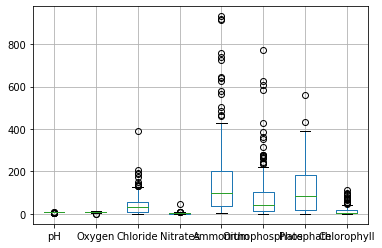

In [22]:
import matplotlib.pyplot as _plt
_plt.figure()
algae.boxplot(figsize=(10,7))
_plt.show() 

Despite the ability to see the relations among the different value ranges for all variables, it is difficult to analyze 
each one in particular, due to the different scales.

In order to address this difference, we can plot singular boxplots for each variable. Defining a simple function to draw
this kind of chart, is one of the more effective ways to accomplish it.

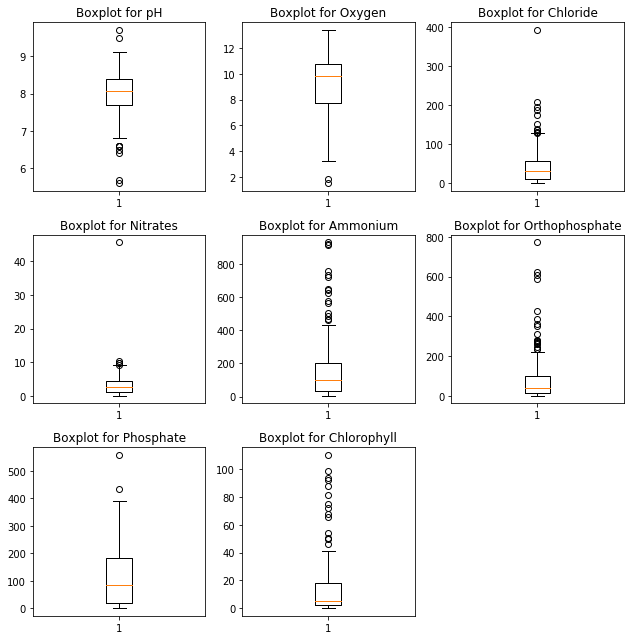

In [23]:
def choose_grid(nr) -> tuple:
    if nr <= 5:
        return (1, nr)
    elif nr < 10:
        return (nr // 3 + 1, 3)
    else:
        return (nr // 5 +1, 5)
    
def boxplot(data, var, rows, cols, i):
    _plt.subplot(rows, cols, i)
    _plt.title("Boxplot for "+var)
    _plt.boxplot(data)

columns = algae.select_dtypes(include='number').columns
n_rows, n_cols = choose_grid(len(columns))
_plt.figure(figsize=[n_rows * 3,n_cols * 3])
for i in range(len(columns)):
    var = columns[i]
    boxplot(algae[var].dropna().values, var, n_rows, n_cols, i+1)
_plt.tight_layout()
_plt.show()
    

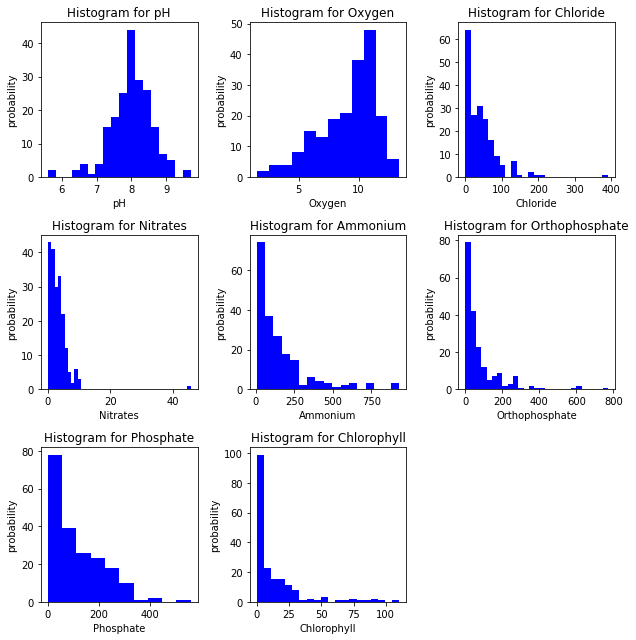

In [24]:
def histogram_4_numeric(data, var, rows, cols, i, nbins='auto'):
    _plt.subplot(rows, cols, i)
    _plt.title("Histogram for " + var)
    _plt.xlabel(var)
    _plt.ylabel("probability")
    _plt.hist(data, nbins, facecolor="blue")
columns = algae.select_dtypes(include='number').columns
n_rows, n_cols = choose_grid(len(columns))    
_plt.figure(figsize=[n_rows * 3,n_cols * 3])
for i in range(len(columns)):
    var = columns[i]
    histogram_4_numeric(algae[var].dropna().values, var, n_rows, n_cols, i+1)
_plt.tight_layout()
_plt.show()

Histograms for categorical variables may also be produced, just through the use of bar charts.

In [ ]:
def histogram_4_categorical(data, var, rows, cols, i):
    _plt.subplot(rows, cols, i)
    _plt.title("Histogram for " + var)
    _plt.xlabel(var)
    _plt.ylabel("probability")
    _plt.hist(data, facecolor="blue")

_plt.figure(figsize=[n_rows * 3,n_cols * 3])
for i in range(len(columns)):
    var = columns[i]
    histogram_4_numeric(algae[var].dropna().values, var, n_rows, n_cols, i+1)
_plt.tight_layout()
_plt.show()


Indeed histograms give us an insight about the distribution of each variable, but recognizing the distribution that 
best fits the data is may be hard.
Lets look at the histogram  


